In [ ]:
# import pandas as pd
import numpy as np
import random as rnd
import pandas as pd

# visualization
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/framingham.csv')

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.shape


(4238, 16)

In [ ]:
median_education= data['education'].median()
median_cigsPerDay= data['cigsPerDay'].median()
median_BPMeds= data['BPMeds'].median()
median_totChol= data['totChol'].median()
median_BMI= data['BMI'].median()
median_heartRate= data['heartRate'].median()
median_glucose= data['glucose'].median()


In [ ]:
data['education'].fillna(median_education, inplace=True)
data['cigsPerDay'].fillna(median_cigsPerDay, inplace=True)
data['BPMeds'].fillna(median_BPMeds, inplace=True)
data['totChol'].fillna(median_totChol, inplace=True)
data['BMI'].fillna(median_BMI, inplace=True)
data['heartRate'].fillna(median_heartRate, inplace=True)
data['glucose'].fillna(median_glucose, inplace=True)

# data.dropna(inplace=True)


In [ ]:
data.isna().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [ ]:
data.duplicated().any()

False

### Splitting data

In [ ]:
import pandas as pd
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics



In [ ]:
normalized_data=(data-data.min())/(data.max()-data.min())

In [ ]:
X = normalized_data.drop(['TenYearCHD'], axis=1)
Y = normalized_data['TenYearCHD']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Using softmax

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt


model_softmax = Sequential()
model_softmax.add(Dense(2, activation='softmax', input_dim=15))



In [ ]:
model_softmax.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
model_softmax.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 2)                 32        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results=model_softmax.fit(
    x=X_train,
    y=Y_train,
    shuffle=True,
    epochs=30,
    batch_size=16,
    validation_data=(X_test, Y_test)
)

Epoch 1/30
183/183 [==============================] - 1s 2ms/step - loss: 0.5466 - accuracy: 0.7969 - val_loss: 0.4823 - val_accuracy: 0.8388
Epoch 2/30
183/183 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.8482 - val_loss: 0.4646 - val_accuracy: 0.8443
Epoch 3/30
183/183 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.8485 - val_loss: 0.4573 - val_accuracy: 0.8443
Epoch 4/30
183/183 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.8485 - val_loss: 0.4513 - val_accuracy: 0.8443
Epoch 5/30
183/183 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8485 - val_loss: 0.4461 - val_accuracy: 0.8443
Epoch 6/30
183/183 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8485 - val_loss: 0.4417 - val_accuracy: 0.8443
Epoch 7/30
183/183 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8485 - val_loss: 0.4381 - val_accuracy: 0.8443
Epoch 

### Using sigmoid 

In [ ]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(1, activation='sigmoid', input_dim=15))

In [ ]:
model_sigmoid.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
model_sigmoid.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 16        
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results=model_softmax.fit(
    x=X_train,
    y=Y_train,
    shuffle=True,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, Y_test)
)

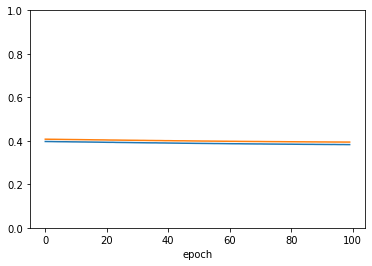

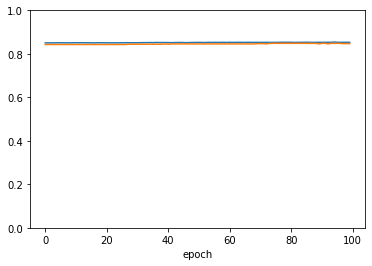

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.xlabel('epoch')
plt.ylim([0,1])
plt.show()
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylim([0,1])
plt.show()
# plt.legend(['Training'])


In [ ]:
from sklearn import datasets, svm

model_svm = svm.SVC(C=1.0, kernel='rbf')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# model fitting
model_svm.fit(X_train, Y_train)

# predict using the model
pred = model_svm.predict(X_test)

# model validation
print(accuracy_score(pred, Y_test))
print(classification_report(pred, Y_test))

0.8278301886792453
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91       848
         1.0       0.00      0.00      0.00         0

    accuracy                           0.83       848
   macro avg       0.50      0.41      0.45       848
weighted avg       1.00      0.83      0.91       848



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
